# 2.2.8 Pruebas de Hipótesis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from scipy.stats import norm, lognorm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Una de las aplicaciones más importantes de las funciones teóricas de probabilidad es la prueba de hipótesis. En este tipo de problemas se quiere determinar si un valor observado (estadístico) proviene de una determinada distribución de probabilidades, con el fin de aceptar o rechazar una hipótesis sobre los datos. El uso de las pruebas de hipótesis es uno de los elementos fundamentales en la construcción de modelos de aprendizaje estadístico.

## Definición

Este es un tipo de prueba que tiene como fin probar una hipótesis (o supuesto), $H_0$, sobre un parámetro o característica de la población versus una hipótesis alternativa complementaria $H_a$, a partir de una muestra de la población.

Si θ denota un estadístico de la muestra, entonces una prueba de hipótesis es una regla que indica cuando aceptar o rechazar la hipótesis nula:

$$ H_0:θ∼(⋅) $$
$$ H_a: en \ caso \ contario $$

## Tipos de errores

Se puede dar una de las siguientes situaciones: (revisar)

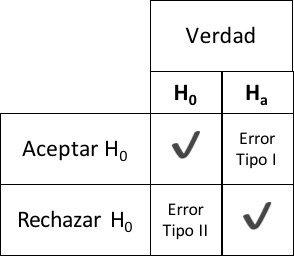

**-> Revisar por que aun no la entiendo**

- Aceptar $H_0$ cuando $H_0$ es verdadera: Ok!.
- Rechazar $H_0$ cuando $H_0$ es falsa: Ok!.
- Rechazar $H_0$ cuando $H_0$ es verdadera: Error Tipo I.
- Aceptar $H_0$ cuando $H_0$ es falsa: Error Tipo II.

Estos cuatro casos están estrechamente relacionados con las matrices de confusión en clasificadores. Por ejemplo, cuando se acepta $H_0$ y $H_0$ es verdadera se tiene un verdadero positivo. Los demás casos se interpretan igual.

## Tipos de pruebas de hipótesis

Se consideran los siguientes tipos:

$ H_0:θ=\alpha,H_a:θ<\alpha$, cola a la izquierda. 

$ H_0:θ=\alpha,H_a:θ≠\alpha$, dos colas. $

$ H_0:θ=\alpha,H_a:θ>\alpha$, cola a la derecha.$

En los tres casos, se desea saber si el valor a está en la región blanca o en la región sombreada de las siguientes figuras. En el caso de la cola a la izquierda, se espera que si a realmente no pertenece a la distribución de probabilidades estipulada, se encuentre ubicado en la región gris y por tanto se pueda rechazar la hipotesis nula; si se supone que \alpha = 1.75, entonces como está ubicado en la región blanca se acepta.

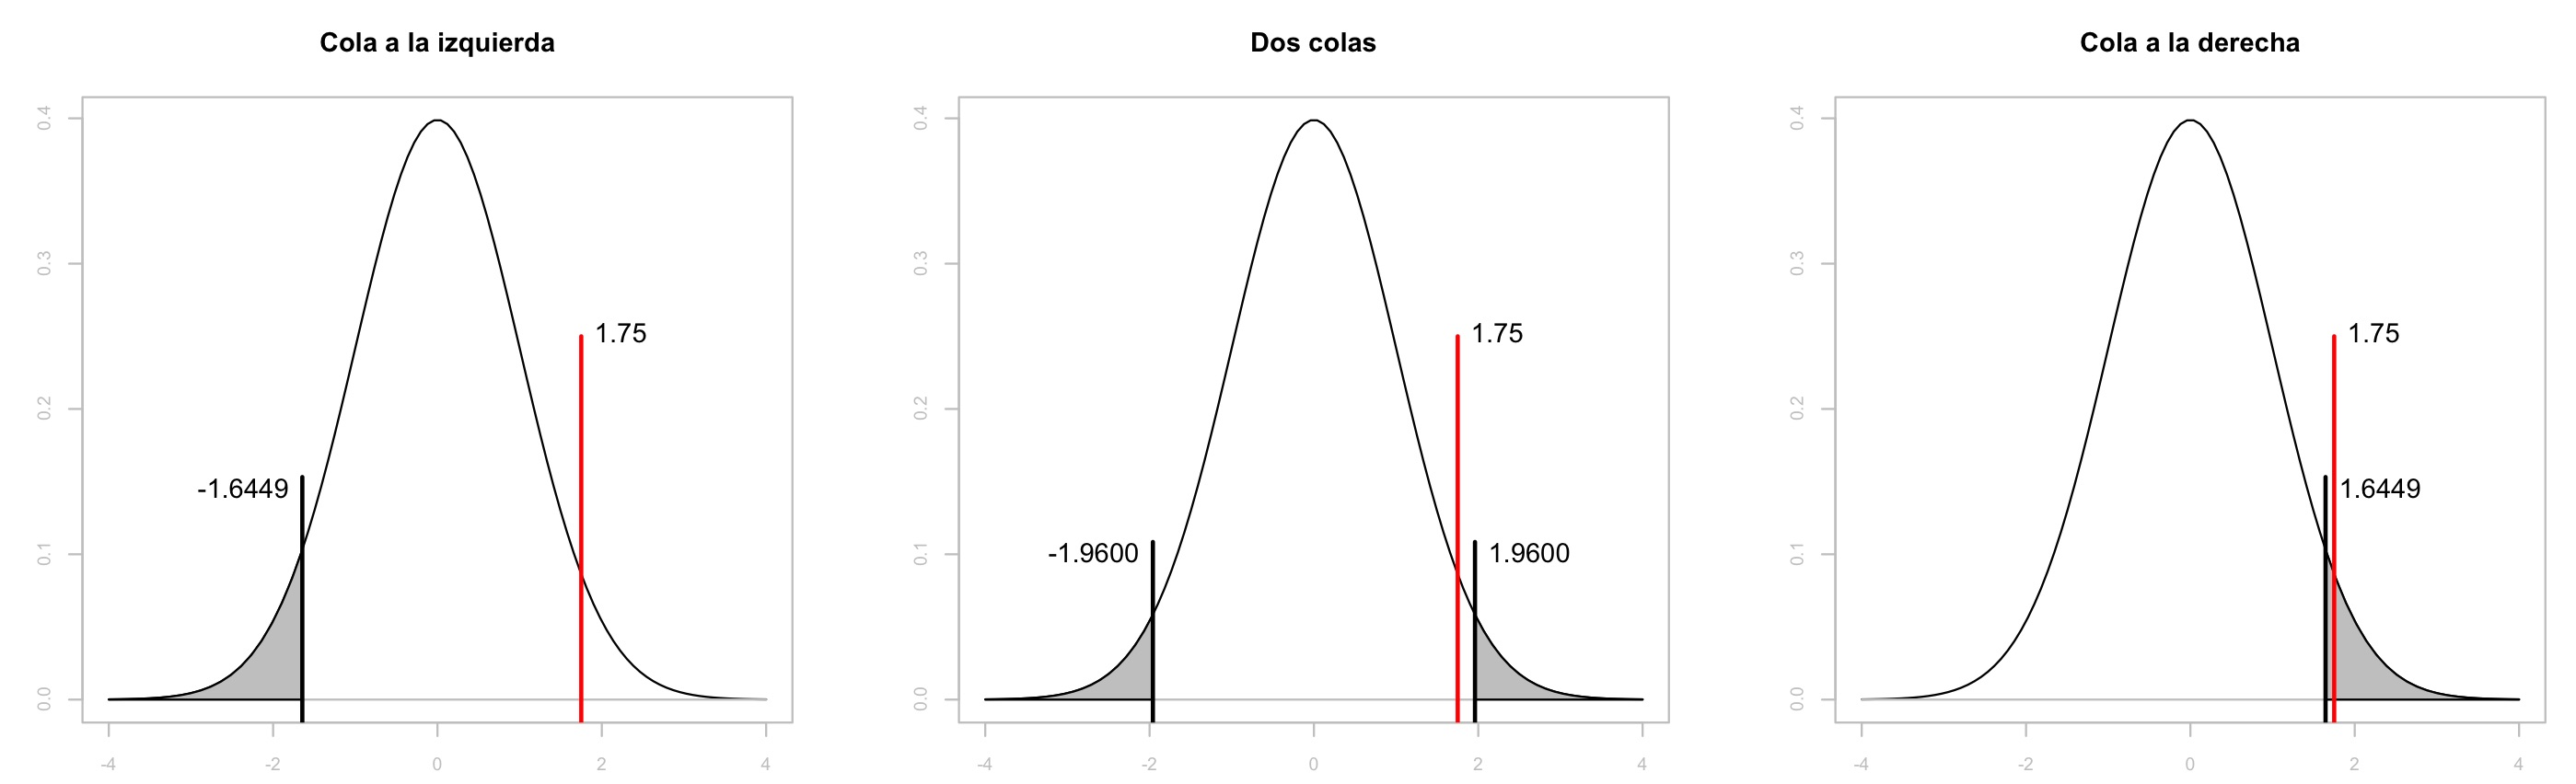

## Prueba usando valores críticos

En esta aproximación:

- Se definen las hipótesis nula y alternativa.
- Se computa el estadístico a partir de la muestra (el valor de $\alpha$).
- Se determina el valor crítico $\alpha$ a partir del nivel de confianza de la prueba usando la distribución conocida que sigue el estadístico; el valor crítico es un valor pequeño, típicamente el nivel de confianza es igual a 0.01, 0.05 o 0.10. El valor critico permite definir el tamaño de la región o regiones sombreadas en la figura anterior.

Si el valor del estadístico es más crítico que el valor crítico calculado se rechaza $H_0$; en caso contrario se acepta $H_0$ como verdadera.

Ejemplo.— El estadístico θ computado a partir de la muestra de datos es 1.75. Determine si la hipótesis nula se acepta o se rechaza para un nivel de confianza de 5% cuando:

- $θ∼N(0,1)$ con cola a la izquierda.
- $θ∼N(0,1)$ con dos colas.
- $θ∼N(0,1)$ con cola a la derecha.

Para la cola a la izquierda se obtiene el valor de z tal que el área sombreada bajo la curva sea de 0.05 (nivel de confianza); esto es, z=−1.6449. Esto es lo mismo que decir que el estadístico de interés caerá el 95% de las veces en el área blanca. Como $θ$=1.75 está en la región no sombreada, se acepta $H_0$.

In [3]:
#
# Area entre -inf y z tal que el area sea 5%
#
norm.ppf(0.05)

-1.6448536269514729

Para el caso de dos colas, el área sombreada total debe ser igual a 0.05, es decir, cada una de las dos regiones sombreadas debe tener un área de 0.025. En este caso, z=±1.9600. Ya que para una confianza de 0.05, ocurre que −1.96≤θ≤1.96 el 95% de las veces, se acepta $H_0$ para $θ$=1.75.

In [4]:
#
# Area entre -inf y z tal que el area sea 5%/2
# los puntos +/- z son simétricos respecto al origen
#
norm.ppf(0.05 / 2)

-1.9599639845400545

Para el caso de la cola a la derecha, el área sombreada debe ser igual a 0.05; esto ocurre cuando z=1.6449. Es decir, el 95% de las veces ocurrirá que −∞≤θ≤1.6449, entonces se rechaza $H_0$.

In [5]:
#
# Area entre -inf y z tal que el area sea 95%
#
norm.ppf(0.95)

1.6448536269514722

In [6]:
#
# Mismo ejercicio con 90% 
#
print(norm.ppf(0.1))
print(norm.ppf(0.1 / 2))
print(norm.ppf(0.90))

-1.2815515655446004
-1.6448536269514729
1.2815515655446004


In [7]:
#
# Mismo ejercicio con 99% 
#
print(norm.ppf(0.01))
print(norm.ppf(0.01 / 2))
print(norm.ppf(0.99))

-2.3263478740408408
-2.575829303548901
2.3263478740408408


## Prueba usando el valor-P

En esta aproximación:

- Se definen las hipótesis nula y alternativa.
- Se computa el estadístico a partir de la muestra.
- Se calcula el valor-P usando la distribución conocida que sigue el estadístico. Este es el valor del área de la distribución de probabilidades en que se rechaza la hipótesis nula.
- Se establece el nivel de significancia $\alpha$ (típicamente 0.01, 0.05 o 0.10) y se compara con el valor-$\alpha$.
- Si el valor-P es menor o igual a α se rechaza $H_0$; en caso contario se acepta.

El estadístico $θ$ computado a partir de la muestra de datos es 1.75. Determine si la hipótesis nula se acepta o se rechaza para un nivel de confianza de 0.05 cuando:

- $θ∼N(0,1)$ con cola a la izquierda.
- $θ∼N(0,1)$ con dos colas.
- $θ∼N(0,1)$ con cola a la derecha.

- Para la cola a la izquierda se obtiene el valor-P para $θ$=1.75, es decir, el área sombreada bajo la curva, o valor-P = 0.9599. Ya que el valor-P = 0.9599 > 0.05 (nivel de confianza) se acepta $H_0$

In [8]:
#
# Area entre -inf y 1.75
#
norm.cdf(1.75)

0.9599408431361829

Para el caso de dos colas, el área sombreada bajo la curva es 0.0801 (valor-P); ya que 0.0801 > 0.05 (nivel de confianza), entonces se acepta $H_0$

In [9]:
#
# Area entre -inf y -1.75 mas 1.75 e +inf, simétricas
#
2 * norm.cdf(-1.75)

0.08011831372763417

Para el caso de la cola a la derecha, el área sombreada es 0.0401; ya que valor-P = 0.0401 < 0.05 se rechaza $H_0$

In [10]:
#
# Area entre 1.75 e +inf =
#   1.0 - area entre -inf y 1.75
#
1.0 - norm.cdf(1.75)

0.040059156863817114

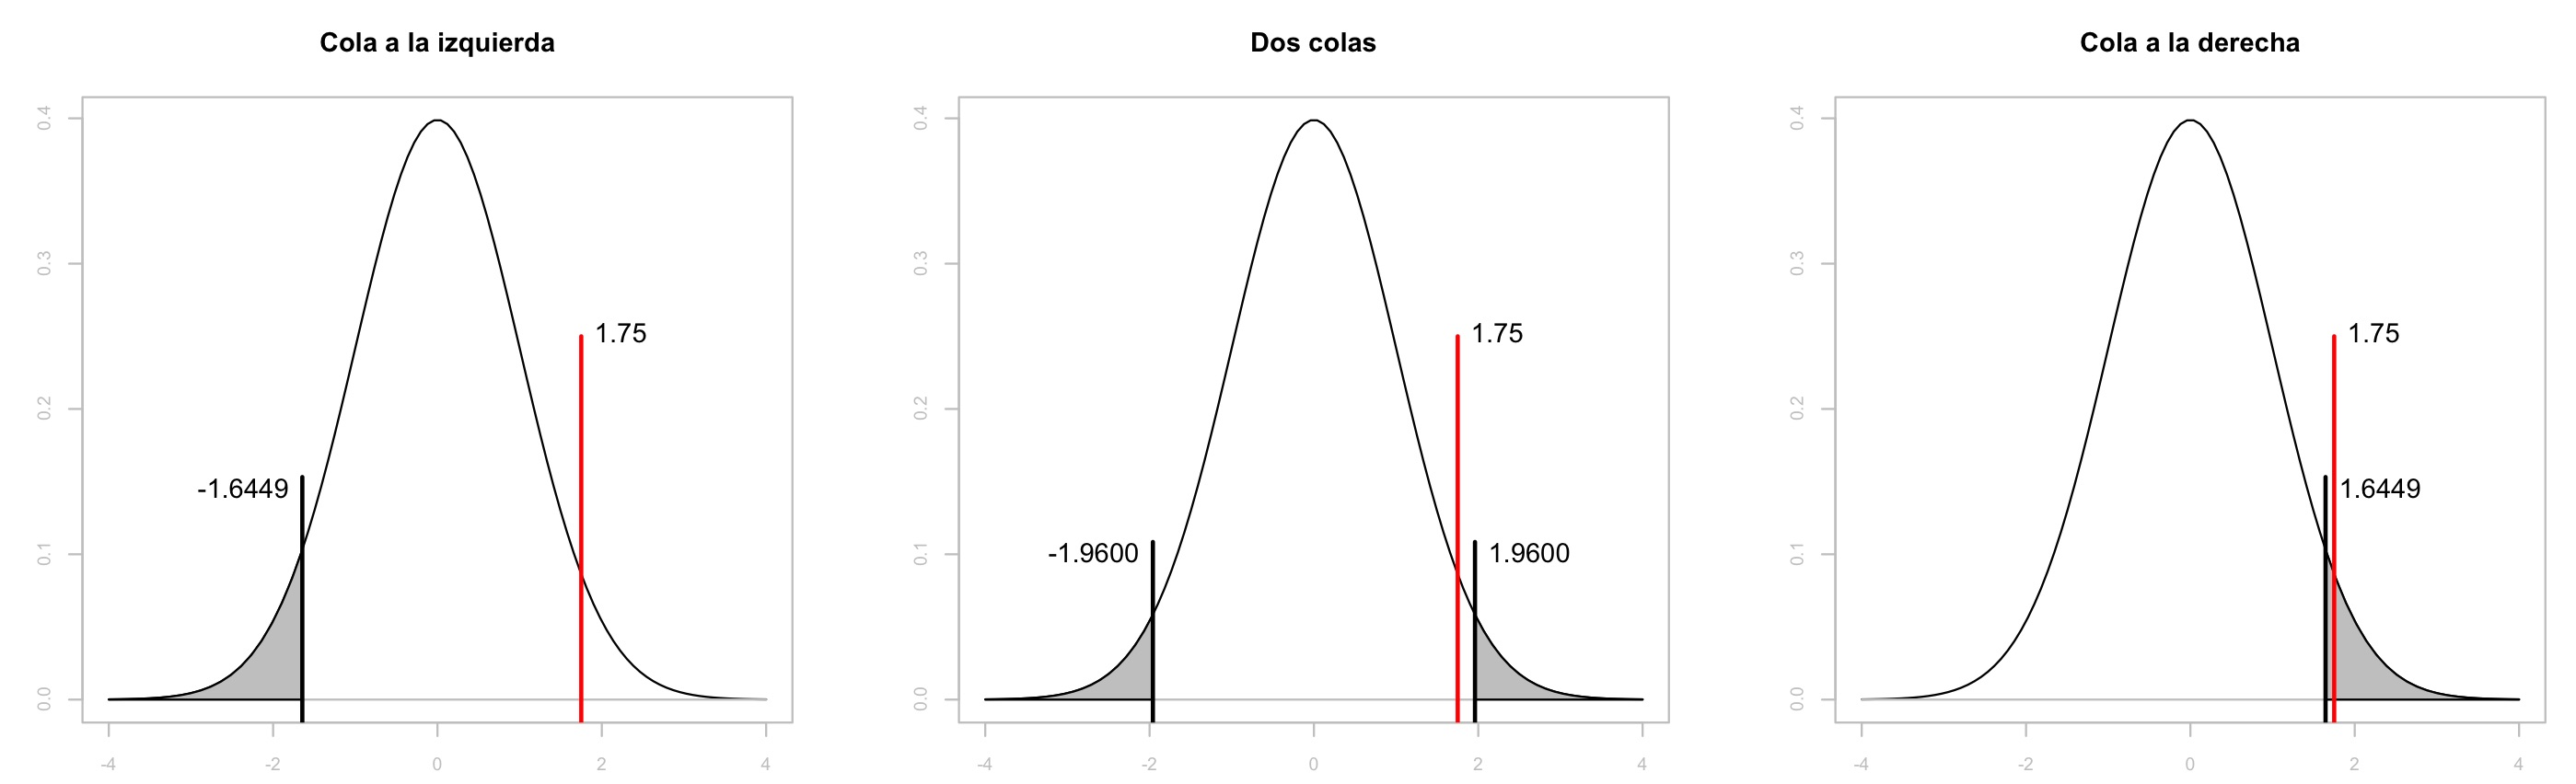

In [11]:
# Definir los parámetros de la distribución log-normal
mu = 0  # Media
sigma = 1  # Desviación estándar

# Valor observado
theta = 2.98

# Calcular la probabilidad acumulativa (CDF) para el valor observado
p_value = 1 - lognorm.cdf(theta, s=sigma, scale=2**mu)

# Nivel de significancia (alfa)
alpha = 0.05

# Comprobar si se rechaza o se acepta H0
if p_value < alpha:
    print(f"Se rechaza H0 para la cola a la derecha (p-value = {p_value})")
else:
    print(f"Se acepta H0 para la cola a la derecha (p-value = {p_value})")


Se acepta H0 para la cola a la derecha (p-value = 0.13743340759498635)


In [12]:
#
# Area entre 1.75 e +inf =
#   1.0 - area entre -inf y 1.75
#
1.0 - lognorm.cdf(theta, s=sigma, scale=2**mu)

0.13743340759498635

In [13]:
print('ok_')

ok_
